In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D

# Data

In [5]:
student = pd.read_csv("../Histories/montecarlo_2/Student.csv")
montecarlo_kd = pd.read_csv("../Histories/montecarlo_2/KD_0.01_2.5.csv")
kd_ig_1 = pd.read_csv("../Histories/montecarlo_2/KD_IG_0.01_2.5_part1.csv")
kd_ig_2= pd.read_csv("../Histories/montecarlo_2/KD_IG_0.01_2.5_part2.csv")
kd_ig_at = pd.read_csv("../Histories/montecarlo_2/KD_IG_AT.csv")
kd = pd.read_csv("../Histories/Tuned_kd.csv")

In [6]:
kd_ig = pd.concat([kd_ig_1, kd_ig_2], axis=0)

In [9]:
len(student), len(montecarlo_kd), len(kd_ig), len(kd_ig_at)

(60, 60, 60, 60)

In [5]:
kd.head()

,Alpha,Temperature,Test Acc.
0,0.0005,1.5,91.62
1,0.0005,2.0,91.77
2,0.0005,2.5,91.57
3,0.0005,3.0,91.55
4,0.0005,4.0,91.77


In [6]:
# Extracting the data
alpha = np.array(kd["Alpha"])
temp = np.array(kd["Temperature"])
accuracy = np.array(kd["Test Acc."])

In [7]:
# Find the index of the maximum accuracy
max_index = np.argmax(accuracy)

# Coordinates of the point with the highest accuracy
max_alpha = alpha[max_index]
max_temp = temp[max_index]
max_accuracy = accuracy[max_index]

In [8]:
print(max_accuracy, max_alpha, max_temp)

92.29 0.01 2.5


# 3D Plot

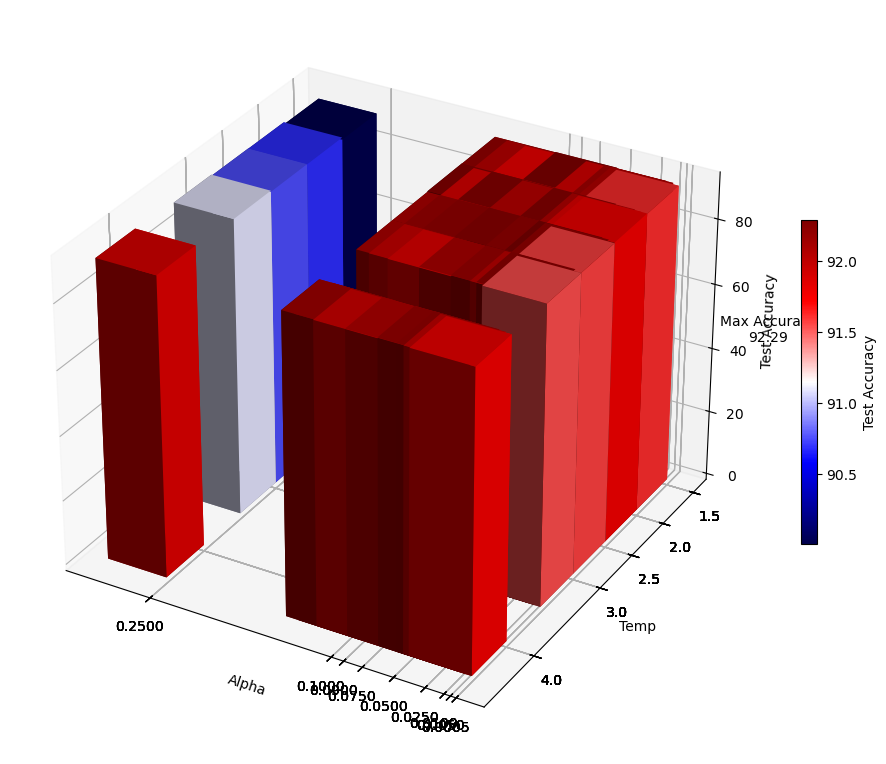

In [9]:
# Creating a 3D bar plot
fig = plt.figure(figsize=(12,28))
ax = fig.add_subplot(111, projection='3d')

# Create a color map based on accuracy values
norm = plt.Normalize(accuracy.min(), accuracy.max())
colors = plt.cm.seismic(norm(accuracy))

# Plotting the 3D bars
ax.bar3d(alpha, temp, np.zeros_like(accuracy), 0.05, 0.5, accuracy, color=colors)

# Annotate the maximum accuracy bar
ax.text(max_alpha-0.24, max_temp+2.5, max_accuracy + 40, f"Max Accuracy\n{max_accuracy:.2f}", color='black', ha='center')

# Adjust the view angle for better visibility
ax.view_init(elev=30, azim=120)

# Adding labels
ax.set_xlabel('Alpha')
ax.set_xticks(alpha)
ax.set_ylabel('Temp')
ax.set_yticks(temp)
ax.set_zlabel('Test Accuracy')

# Add a color bar which maps values to colors
mappable = plt.cm.ScalarMappable(cmap=plt.cm.seismic, norm=norm)
mappable.set_array(accuracy)

# Create a colorbar with correct placement
cbar = fig.colorbar(mappable, ax=ax, shrink=0.15, aspect=20)
cbar.set_label('Test Accuracy')

plt.show()

In [10]:
# Unique values of Alpha and Temp
unique_alpha = np.sort(kd['Alpha'].unique())
unique_temp = np.sort(kd['Temperature'].unique())

# Meshgrid for Alpha and Temp
X, Y = np.meshgrid(unique_alpha, unique_temp)

# Map Test Accuracy to the grid
accuracy_grid = np.empty(X.shape)
for i, alpha in enumerate(unique_alpha):
    for j, temp in enumerate(unique_temp):
        # Selecting the Test Accuracy value corresponding to each pair of (alpha, temp)
        accuracy_grid[j, i] = kd[(kd['Alpha'] == alpha) & (kd['Temperature'] == temp)]['Test Acc.'].values[0]

# Surface Plot

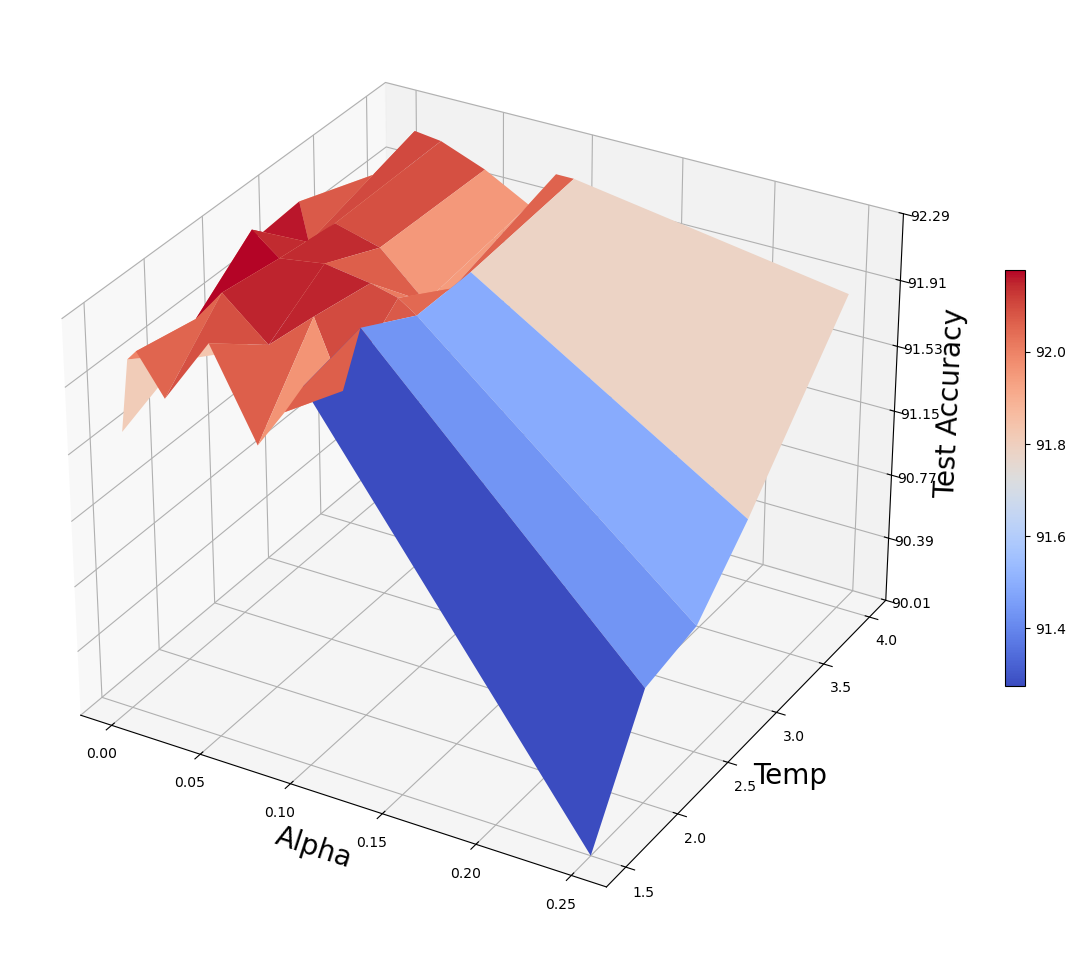

In [10]:
# Creating a 3D bar plot
fig = plt.figure(figsize=(12,28))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, accuracy_grid, cmap=cm.coolwarm, linewidth=1, antialiased=True)

# Customize the z axis.
ax.set_zlim(accuracy_grid.min(), accuracy_grid.max())
ax.zaxis.set_major_locator(LinearLocator(7))
ax.zaxis.set_major_formatter('{x:.02f}')

# Labels for axes
ax.set_xlabel('Alpha', fontsize=20)
ax.set_ylabel('Temp', fontsize=20)
ax.set_zlabel('Test Accuracy', fontsize=20)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=.15, aspect=20)
# plt.savefig('/Users/davidhernandez/Desktop/Nordling_Lab/nordlinglab-grants-publications/Article_Chang2024_integrated_gradients/sn_version_corrected/article/Figures/surface_plot.pdf')
plt.tight_layout()
plt.show()

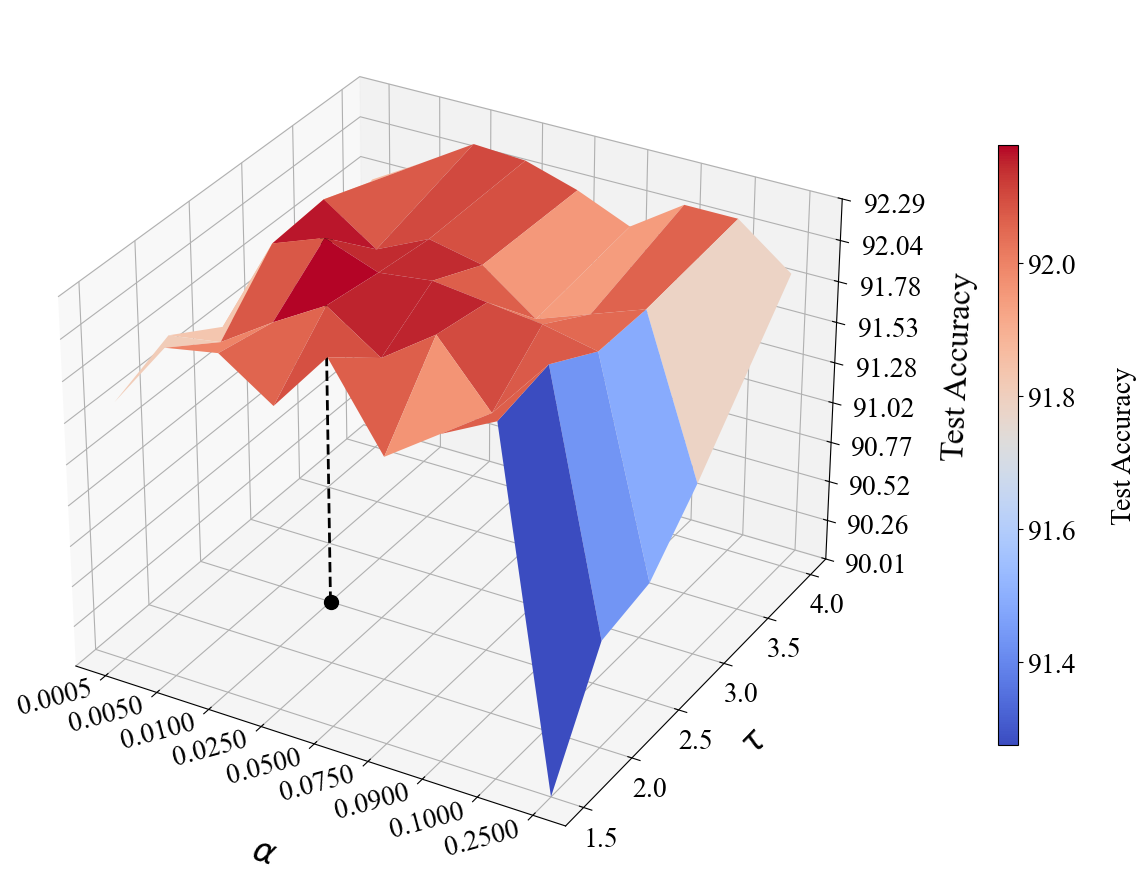

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FixedLocator, FuncFormatter

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

# Assuming kd is your DataFrame
unique_alpha = np.sort(kd['Alpha'].unique())
unique_temp = np.sort(kd['Temperature'].unique())

# Map Alpha values to categorical indices
alpha_indices = {alpha: i for i, alpha in enumerate(unique_alpha)}

# Meshgrid for categorical indices of Alpha and Temp
X, Y = np.meshgrid(range(len(unique_alpha)), unique_temp)

# Map Test Accuracy to the grid
accuracy_grid = np.empty(X.shape)
for i, alpha in enumerate(unique_alpha):
    for j, temp in enumerate(unique_temp):
        accuracy_grid[j, i] = kd[(kd['Alpha'] == alpha) & (kd['Temperature'] == temp)]['Test Acc.'].values[0]

# Finding the indices of the maximum accuracy
max_index = np.unravel_index(np.argmax(accuracy_grid), accuracy_grid.shape)
max_accuracy = accuracy_grid[max_index]
max_alpha = unique_alpha[max_index[1]]
max_temp = unique_temp[max_index[0]]

# Creating a 3D plot
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, accuracy_grid, cmap=cm.coolwarm, linewidth=1, antialiased=True)

# Highlight the maximum with a line
ax.plot([max_index[1], max_index[1]], [max_temp, max_temp], [accuracy_grid.min(), max_accuracy], color='k', marker='o', markersize=10, linestyle="--", linewidth=2)

# Customize the x-axis to show original Alpha values
ax.set_xticks(range(len(unique_alpha)))
ax.set_xticklabels([f'{alpha:.4f}' for alpha in unique_alpha], rotation=15, ha='right', va='center')

# Customize the z axis.
ax.set_zlim(accuracy_grid.min(), accuracy_grid.max())
ax.zaxis.set_major_locator(LinearLocator(10))  # Set an appropriate number of ticks
ax.zaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.02f}'))
ax.zaxis.set_tick_params(pad=15)  # Increase padding for z-axis labels

# Labels for axes
ax.set_xlabel(r'$\alpha$', fontsize=24, labelpad=35)
ax.set_ylabel(r'$\tau$', fontsize=24, labelpad=15)
ax.set_zlabel('Test Accuracy', fontsize=24, labelpad=35)

# Add a color bar which maps values to colors.
cbar = fig.colorbar(surf, shrink=0.65, aspect=30, pad=0.1)
cbar.set_label('Test Accuracy', rotation=90, labelpad=25)

# Adjust layout
# plt.tight_layout()
# plt.savefig('Hernandez2024_surface_plot.pdf')
plt.show()

# Distribution Plot

In [10]:
KD_mean = montecarlo_kd["Test Accuracy"].mean()
KD_IG_mean = kd_ig['Test Accuracy'].mean()
KD_IG_AT_mean = kd_ig_at['Test Accuracy'].mean()
# montecarlo_ig_mean = ig['Test Accuracy'].mean()
student_mean = student['Test Accuracy'].mean()

In [11]:
KD_median = montecarlo_kd["Test Accuracy"].median()
KD_IG_median = kd_ig['Test Accuracy'].median()
KD_IG_AT_median = kd_ig_at['Test Accuracy'].median()
# montecarlo_ig_mean = ig['Test Accuracy'].mean()
student_median = student['Test Accuracy'].median()

In [12]:
KD_var = montecarlo_kd["Test Accuracy"].var()
KD_IG_var = kd_ig['Test Accuracy'].var()
KD_IG_AT_var = kd_ig_at['Test Accuracy'].var()
# montecarlo_ig_mean = ig['Test Accuracy'].mean()
student_var = student['Test Accuracy'].var()
KD_var, KD_IG_var, KD_IG_AT_var, student_var

(0.11340957627118683,
 0.30543785310734467,
 0.08814946327683629,
 0.1175772598870052)

In [13]:
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors

In [14]:
lilliefors(student["Test Accuracy"], dist='norm', pvalmethod='table')

(0.08621269856923941, 0.3746266970230655)

In [15]:
lilliefors(montecarlo_kd["Test Accuracy"], dist='norm', pvalmethod='table')

(0.07680924800230615, 0.5511217185079664)

In [16]:
lilliefors(kd_ig["Test Accuracy"], dist='norm', pvalmethod='table')

(0.0978258994913338, 0.20241937872919696)

In [17]:
# lilliefors(montecarlo_ig["Test Accuracy"], dist='norm', pvalmethod='table')

In [18]:
lilliefors(kd_ig_at["Test Accuracy"], dist='norm', pvalmethod='table')

(0.059269018037424126, 0.8937474035215736)

In [19]:
stats.ttest_ind(montecarlo_kd["Test Accuracy"], student["Test Accuracy"], equal_var=True)

TtestResult(statistic=9.739991085638106, pvalue=8.294258124301794e-17, df=118.0)

In [20]:
stats.ttest_ind(kd_ig["Test Accuracy"], student["Test Accuracy"], equal_var=True)

TtestResult(statistic=14.797695309710354, pvalue=1.174280723515254e-28, df=118.0)

In [21]:
stats.ttest_ind(kd_ig_at["Test Accuracy"], student["Test Accuracy"], equal_var=True)

TtestResult(statistic=14.322527108449451, pvalue=1.4095901501211661e-27, df=118.0)

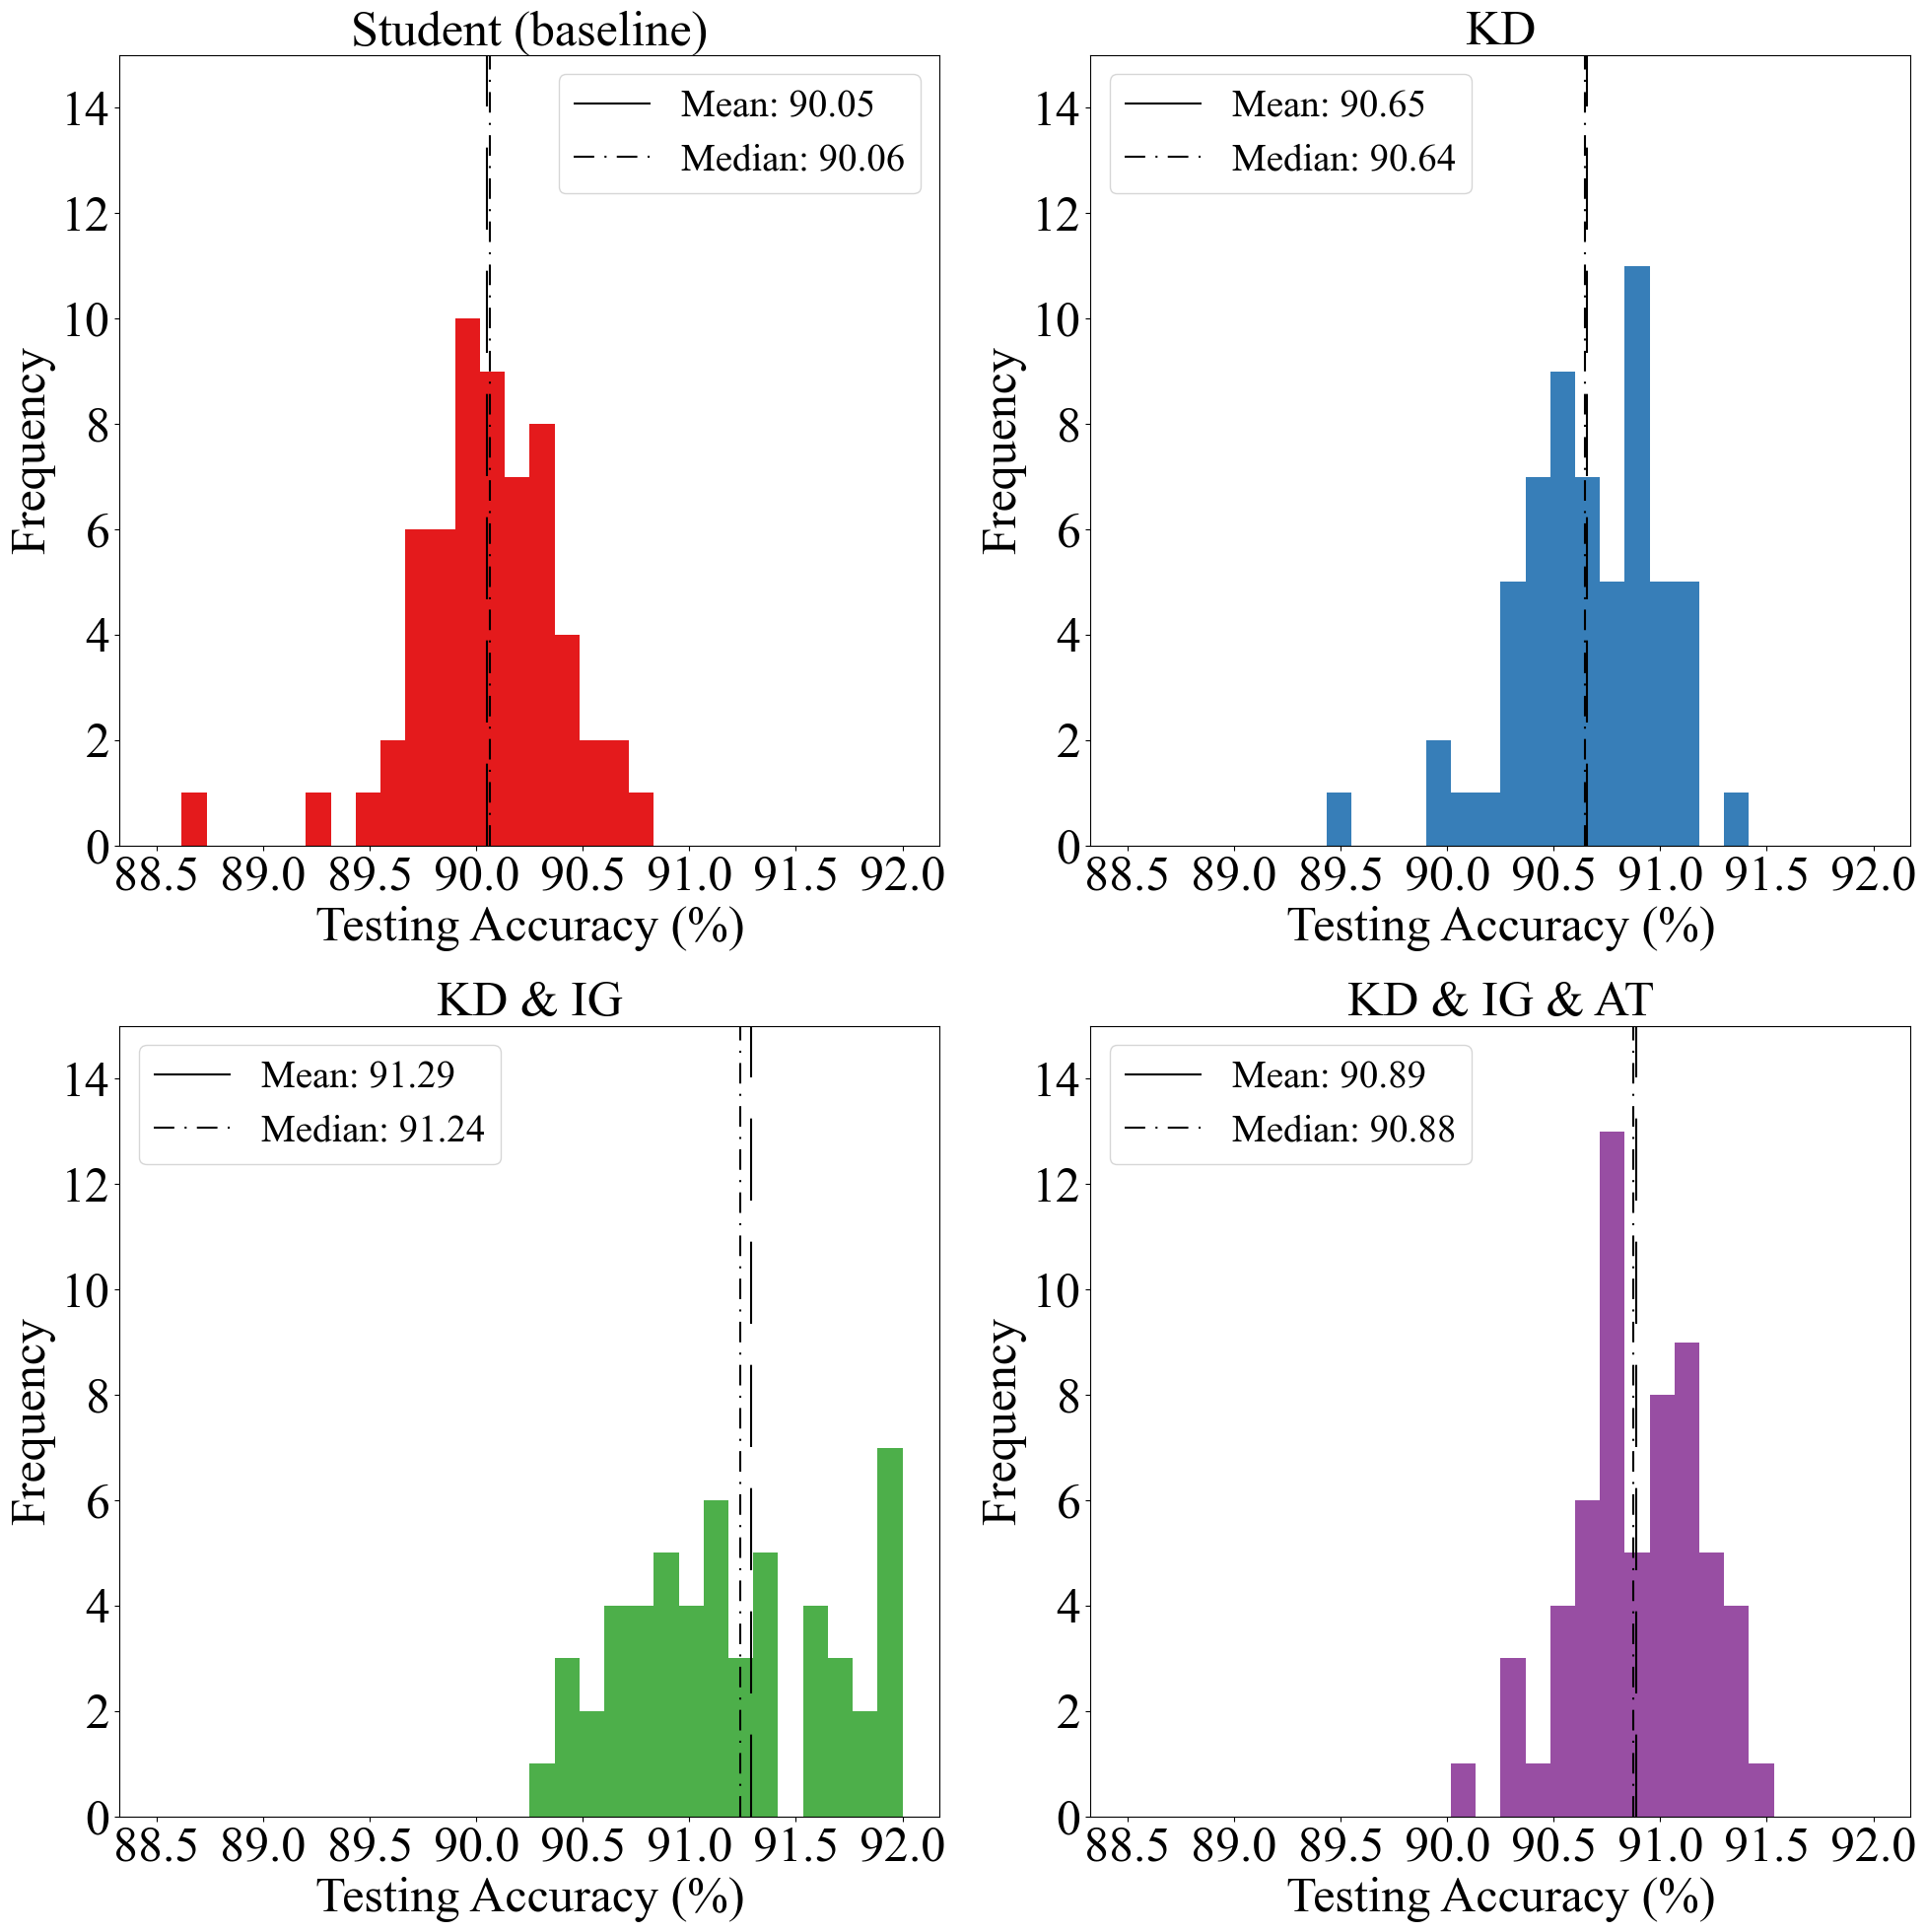

In [55]:
dash = (40, 20)
dots = ([10, 5, 1, 5])
bins = 30
range=(88.5, 92)
rows = 2
columns = 2
title_size = 36
font_size = 36
ylim = (0,15)

plt.figure(figsize=(20,20))
plt.subplot(rows,columns,1)
plt.hist(student['Test Accuracy'], bins=bins, color='#e41a1c', range=range)
plt.axvline(student_mean, color='black', linestyle='--', label=f"Mean: {student_mean:.2f}", dashes=dash)
plt.axvline(student_median, color='black', linestyle='dashdot', label=f"Median: {student_median:.2f}", dashes=dots)
plt.xlabel("Testing Accuracy (%)", fontsize=font_size)
plt.ylabel("Frequency", fontsize=font_size)
plt.title("Student (baseline)", fontsize=title_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.legend(fontsize=28)
plt.ylim(ylim)

plt.subplot(rows,columns,2)
plt.hist(montecarlo_kd['Test Accuracy'], bins=bins, color='#377eb8', range=range)
plt.axvline(KD_mean, color='black', linestyle='--', label=f"Mean: {KD_mean:.2f}", dashes=dash)
plt.axvline(KD_median, color='black', linestyle='dashdot', label=f"Median: {KD_median:.2f}", dashes=dots)
plt.xlabel("Testing Accuracy (%)", fontsize=font_size)
plt.ylabel("Frequency", fontsize=font_size)
plt.title("KD", fontsize=title_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.legend(fontsize=28)
plt.ylim(ylim)

plt.subplot(rows,columns,3)
plt.hist(kd_ig['Test Accuracy'], bins=bins, color='#4daf4a', range=range)
plt.axvline(KD_IG_mean, color='black', linestyle='--', label=f"Mean: {KD_IG_mean:.2f}", dashes=dash)
plt.axvline(KD_IG_median, color='black', linestyle='dashdot', label=f"Median: {KD_IG_median:.2f}", dashes=dots)
plt.xlabel("Testing Accuracy (%)", fontsize=font_size)
plt.ylabel("Frequency", fontsize=font_size)
plt.title("KD & IG", fontsize=title_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.legend(fontsize=28)
plt.ylim(ylim)

plt.subplot(rows,columns,4)
plt.hist(kd_ig_at['Test Accuracy'], bins=bins, color='#984ea3', range=range)
plt.axvline(KD_IG_AT_mean, color='black', linestyle='--', label=f"Mean: {KD_IG_AT_mean:.2f}", dashes=dash)
plt.axvline(KD_IG_AT_median, color='black', linestyle='dashdot', label=f"Median: {KD_IG_AT_median:.2f}", dashes=dots)
plt.xlabel("Testing Accuracy (%)", fontsize=font_size)
plt.ylabel("Frequency", fontsize=font_size)
plt.title("KD & IG & AT", fontsize=title_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.legend(fontsize=28)
plt.ylim(ylim)

plt.tight_layout()
plt.savefig("Hernandez2024_montecarlo_subplots.pdf")
plt.show()

# Bar Chart

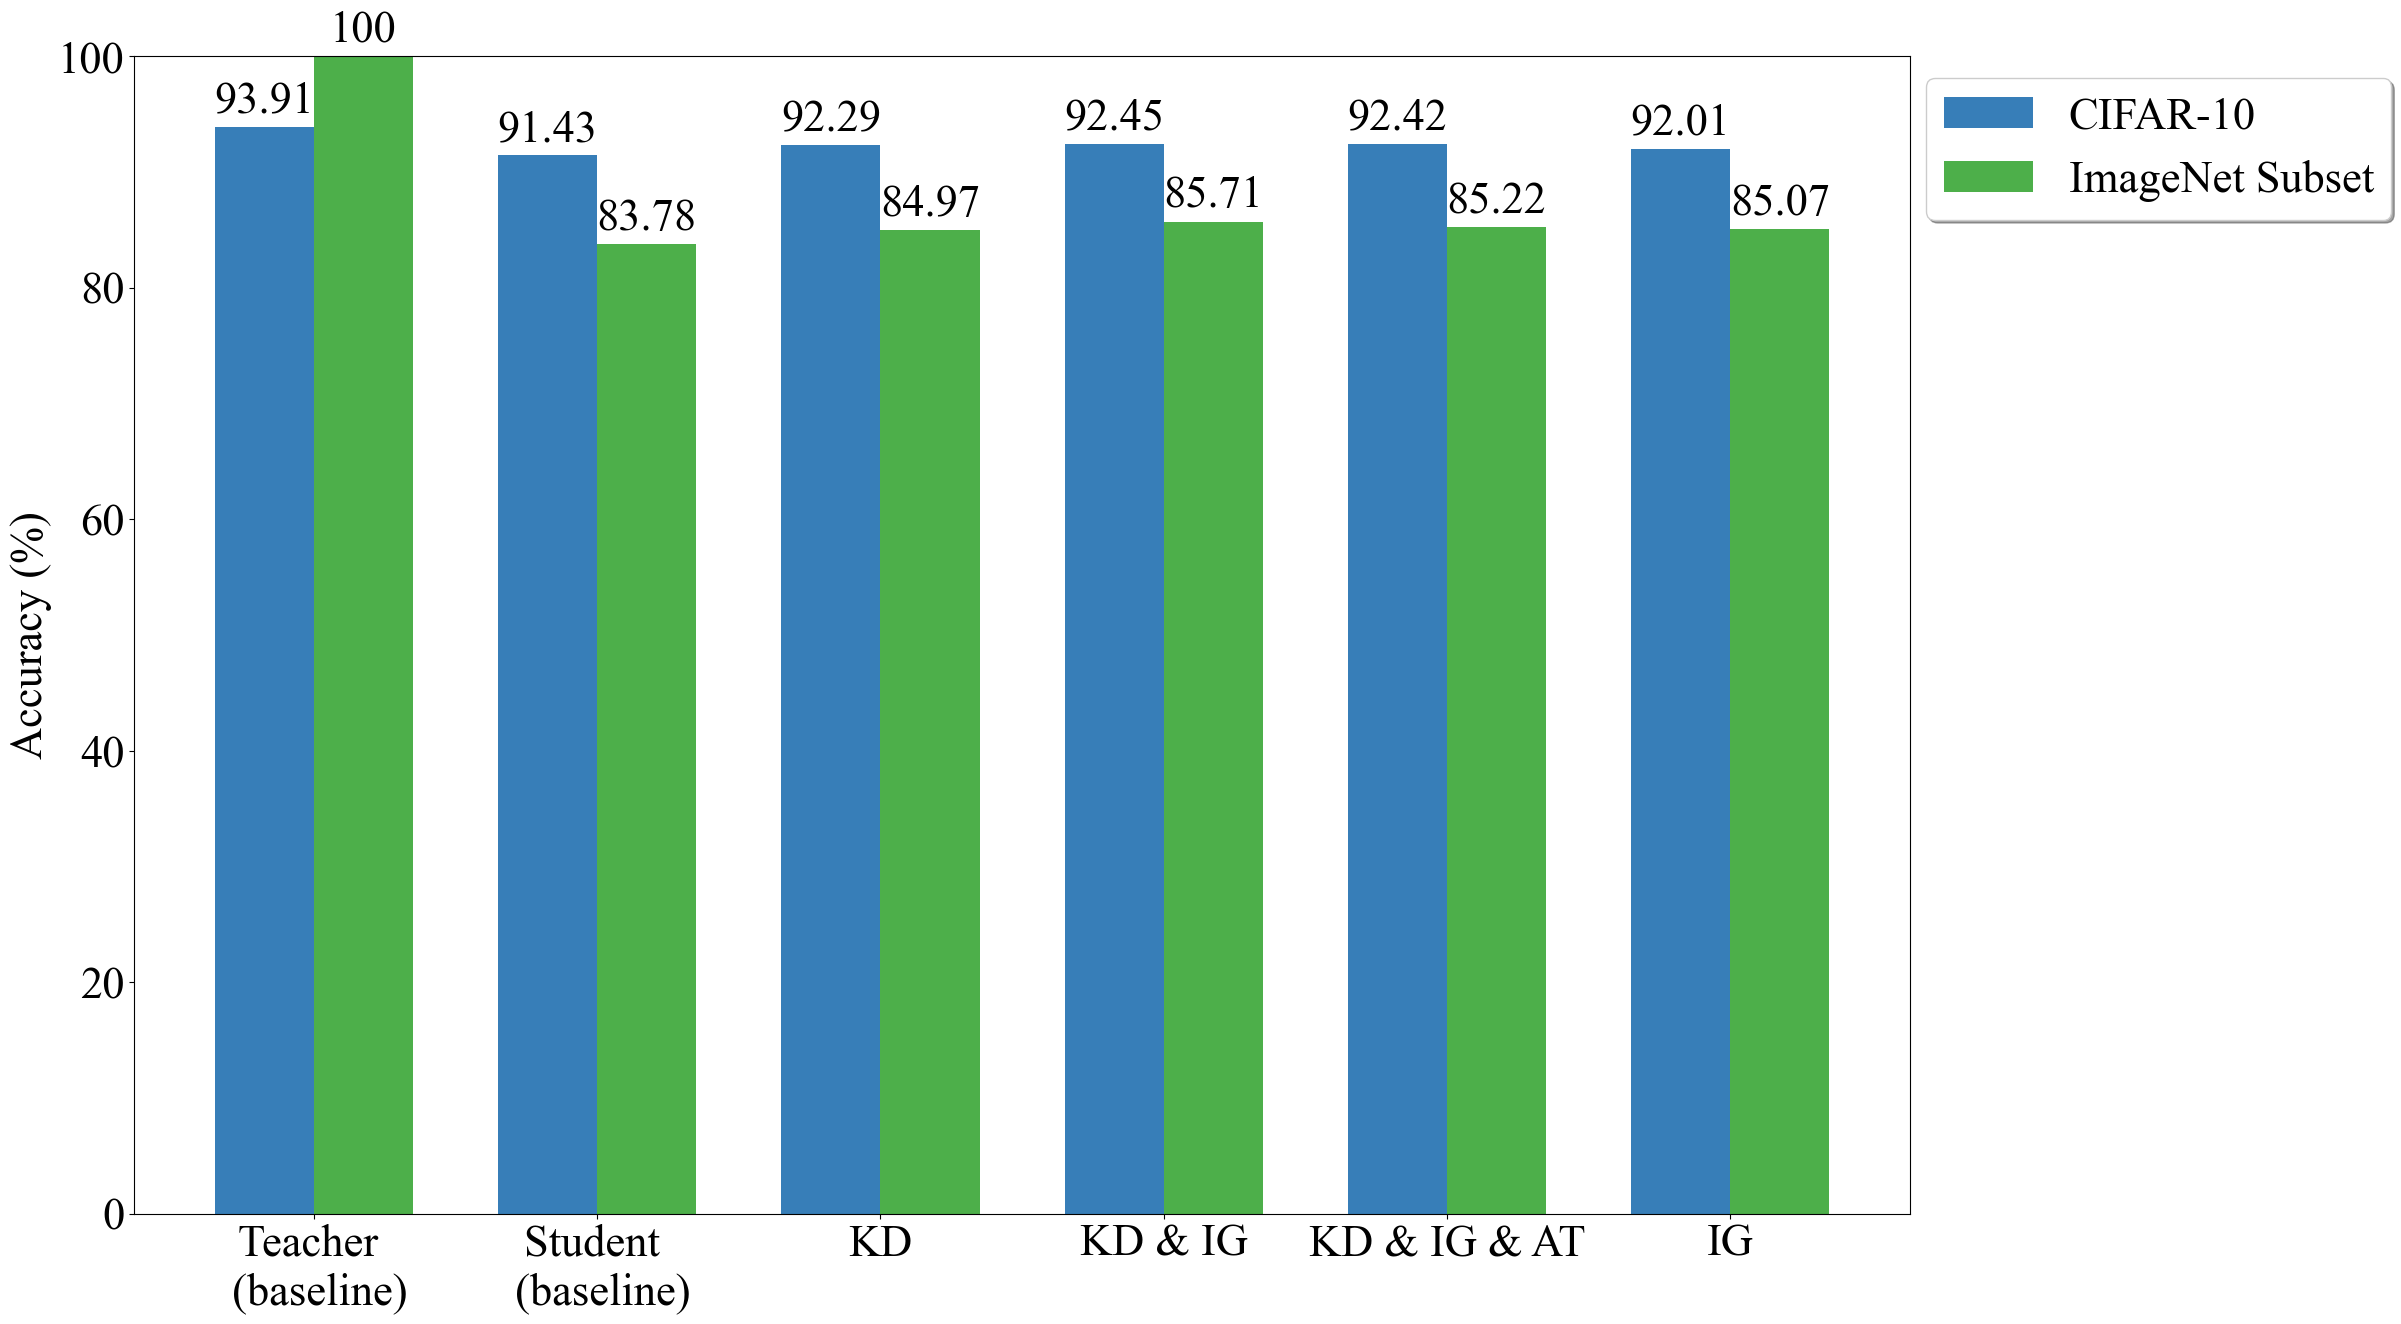

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# plt.style.use(r"rw_visualization.mplstyle")

# Set global font properties
plt.rcParams['font.family'] = 'serif'  # For example, 'serif', 'sans-serif', 'monospace'
plt.rcParams['font.serif'] = ['Times New Roman']  # Or another font from your system
plt.rcParams['font.size'] = 32  # You can adjust the size as needed
plt.rcParams['axes.titlesize'] = 40

# Data
8

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(25,14))
rects1 = ax.bar(x - width/2, cifar_10, width, label='CIFAR-10', color='#377eb8')
rects2 = ax.bar(x + width/2, imagenet, width, label='ImageNet Subset', color='#4daf4a')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (%)')
# ax.set_title('Model Performance on CIFAR-10 and ImageNet Subset')
ax.set_ylim(0,100)

ax.set_xticks(x)
ax.set_xticklabels(models, rotation=0, ha="center")
ax.legend(loc='upper center', bbox_to_anchor=(1.14, 1),
          fancybox=True, shadow=True, ncol=1)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.savefig("Imagenet_bar_chart.pdf")
plt.show()


# CF vs ACC

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator

In [3]:
compression_factors = [1.0, 2.19, 4.12, 7.29, 12.04, 28.97, 54.59, 139.43, 1121.71]

# Teacher accuracy is the baseline at 93.91%
teacher_accuracy = 93.91

# Calculate accuracy relative to teacher (teacher becomes 100%)
def normalize_to_teacher(accuracy_values):
    return [acc * 100 / teacher_accuracy for acc in accuracy_values]

# Original accuracy values
student_baseline = [teacher_accuracy, 90.94, 90.42, 90.63, 89.71, 87.88, 84.09, 76.01, 55.44]
kd_baseline = [teacher_accuracy, 91.21, 90.71, 90.20, 89.68, 87.95, 84.00, 76.80, 54.75]
kd_ig = [teacher_accuracy, 91.67, 90.66, 91.06, 90.0, 87.26, 84.79, 76.44, 54.79]
ig = [teacher_accuracy, 90.91, 90.46, 90.16, 90.06, 87.00, 84.27, 75.45, 55.22]

# Normalize accuracies to teacher (teacher = 100%)
student_normalized = normalize_to_teacher(student_baseline)
kd_normalized = normalize_to_teacher(kd_baseline)
kd_ig_normalized = normalize_to_teacher(kd_ig)
ig_normalized = normalize_to_teacher(ig)

# Speedup data from the table
speedup_values = [1.0, 10.6, 11.1, 15.0, 17.1, 20.6, 25.27, 35.71, 103.5]

/var/folders/jf/6tbrkn7d59x88jstw_8drmxr0000gn/T/ipykernel_60641/407182280.py:51: UserWarning: AutoMinorLocator does not work on logarithmic scales
  ax.get_xticklabels() + ax.get_yticklabels()):
/var/folders/jf/6tbrkn7d59x88jstw_8drmxr0000gn/T/ipykernel_60641/407182280.py:78: UserWarning: AutoMinorLocator does not work on logarithmic scales
  plt.savefig("Compression_speedup.pdf")
/var/folders/jf/6tbrkn7d59x88jstw_8drmxr0000gn/T/ipykernel_60641/407182280.py:78: UserWarning: AutoMinorLocator does not work on logarithmic scales
  plt.savefig("Compression_speedup.pdf")


<Figure size 2400x1500 with 0 Axes>

/Users/davidhernandez/anaconda3/envs/torchm1/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: AutoMinorLocator does not work on logarithmic scales
  fig.canvas.print_figure(bytes_io, **kw)


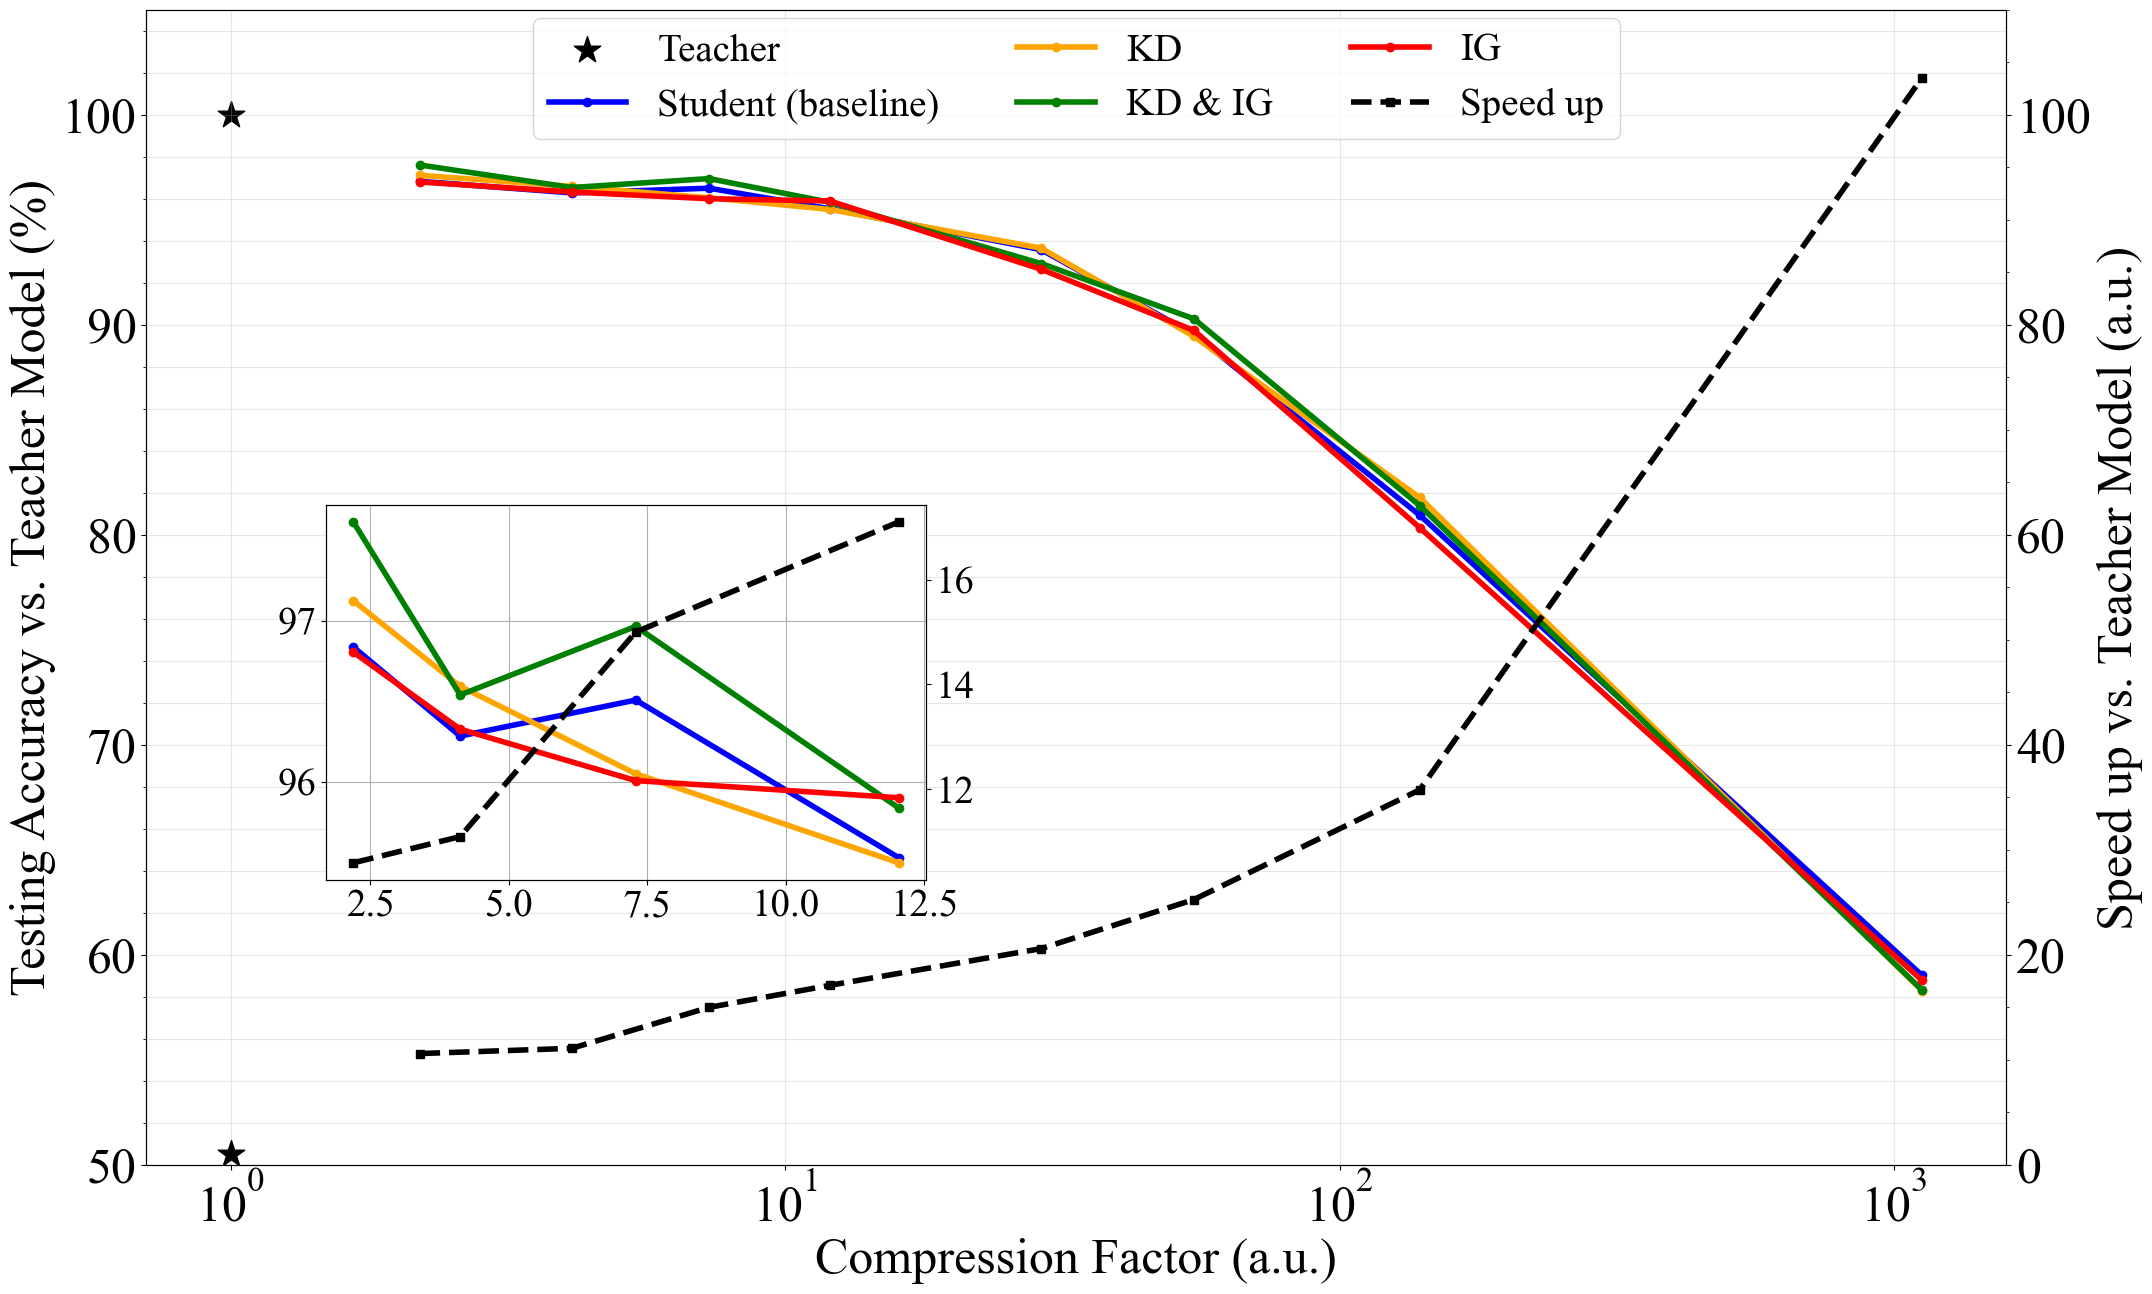

In [4]:
# Main figure setup
plt.figure(figsize=(24, 15))
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 28
plt.rcParams['lines.linewidth'] = 4

# Create figure with two y-axes
fig, ax1 = plt.subplots(figsize=(24, 15))
ax2 = ax1.twinx()

# Add teacher point with star marker
ax1.scatter(compression_factors[0], student_normalized[0], marker='*', color='black', s=400, label='Teacher')

# Plotting on left y-axis (Accuracy)
ax1.plot(compression_factors[1:], student_normalized[1:], marker='o', color='blue', label='Student (baseline)')
ax1.plot(compression_factors[1:], kd_normalized[1:], marker='o', color='orange', label='KD')
ax1.plot(compression_factors[1:], kd_ig_normalized[1:], marker='o', color='green', label='KD & IG')
ax1.plot(compression_factors[1:], ig_normalized[1:], marker='o', color='red', label='IG')

# Plotting on right y-axis (Speedup)
ax2.plot(compression_factors[1:], speedup_values[1:], marker='s', color='black', 
         linestyle='--', label='Speed up')

ax2.scatter(compression_factors[0], speedup_values[0], marker='*', color='black', s=400)

# Configure left y-axis (Accuracy)
ax1.set_xscale('log')
ax1.set_xlabel('Compression Factor (a.u.)')
ax1.set_ylabel('Testing Accuracy vs. Teacher Model (%)')
ax1.set_ylim(50, 105)  # Adjusted to accommodate 100% for teacher
ax1.grid(True, which='both', axis='both', alpha=0.3)

# Configure right y-axis (Speedup)
ax2.set_ylabel('Speed up vs. Teacher Model (a.u.)')
ax2.set_ylim(0, 110)  # Adjusted based on speedup values

# Add minor ticks to both axes
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(.5, 1.01),
          fancybox=True, ncol=3)

# Apply font settings to all elements
for ax in [ax1, ax2]:
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontname("Times New Roman")
        item.set_fontsize(36)

# Add inset for detailed view (optional - adjust if needed)
inset_ax1 = plt.axes([0.1999, 0.3, 0.25, 0.25])
inset_ax2 = inset_ax1.twinx()
compression_factors_mini = compression_factors[1:5]
student_mini = student_normalized[1:5]
kd_mini = kd_normalized[1:5]
kd_ig_mini = kd_ig_normalized[1:5]
ig_mini = ig_normalized[1:5]
speedup_values_mini = speedup_values[1:5]

inset_ax1.plot(compression_factors_mini, student_mini, marker='o', color='blue')
inset_ax1.plot(compression_factors_mini, kd_mini, marker='o', color='orange')
inset_ax1.plot(compression_factors_mini, kd_ig_mini, marker='o', color='green')
inset_ax1.plot(compression_factors_mini, ig_mini, marker='o', color='red')

# inset_ax1.plot(compression_factors_mini[0], student_mini[0], marker='*', color='purple', markersize=20)

inset_ax2.plot(compression_factors_mini, speedup_values_mini, marker='s', color='black', 
         linestyle='--', label='Speed up')

inset_ax1.grid(True)

# plt.tight_layout()
plt.savefig("Compression_speedup.pdf")
plt.show()

# Inference time vs Acc

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

In [ ]:
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 20

In [60]:
# Data from Table 13 and Table 8 in supplementary
compression_factors = [2.2, 4.1, 7.3, 12, 29, 55, 140, 1122]

# Testing accuracies from Table 13
student_baseline = [90.94, 90.42, 90.63, 89.71, 87.88, 84.09, 76.01, 55.44]
kd = [91.21, 90.71, 90.20, 89.68, 87.95, 84.00, 76.80, 54.75]
kd_ig = [91.67, 90.66, 91.06, 90.00, 87.26, 84.79, 76.44, 54.79]
ig = [90.91, 90.46, 90.16, 90.06, 87.00, 84.27, 75.45, 55.22]

# Inference times from Table 8 (seconds/batch of 64 images)
inference_times_batch = [1.33e-2, 1.27e-2, 9.32e-3, 8.20e-3, 6.80e-3, 5.54e-3, 3.92e-3, 1.35e-3]

# Convert to ms/image (divide by 64 and multiply by 1000)
inference_times_ms = [(t / 64) * 1000 for t in inference_times_batch]

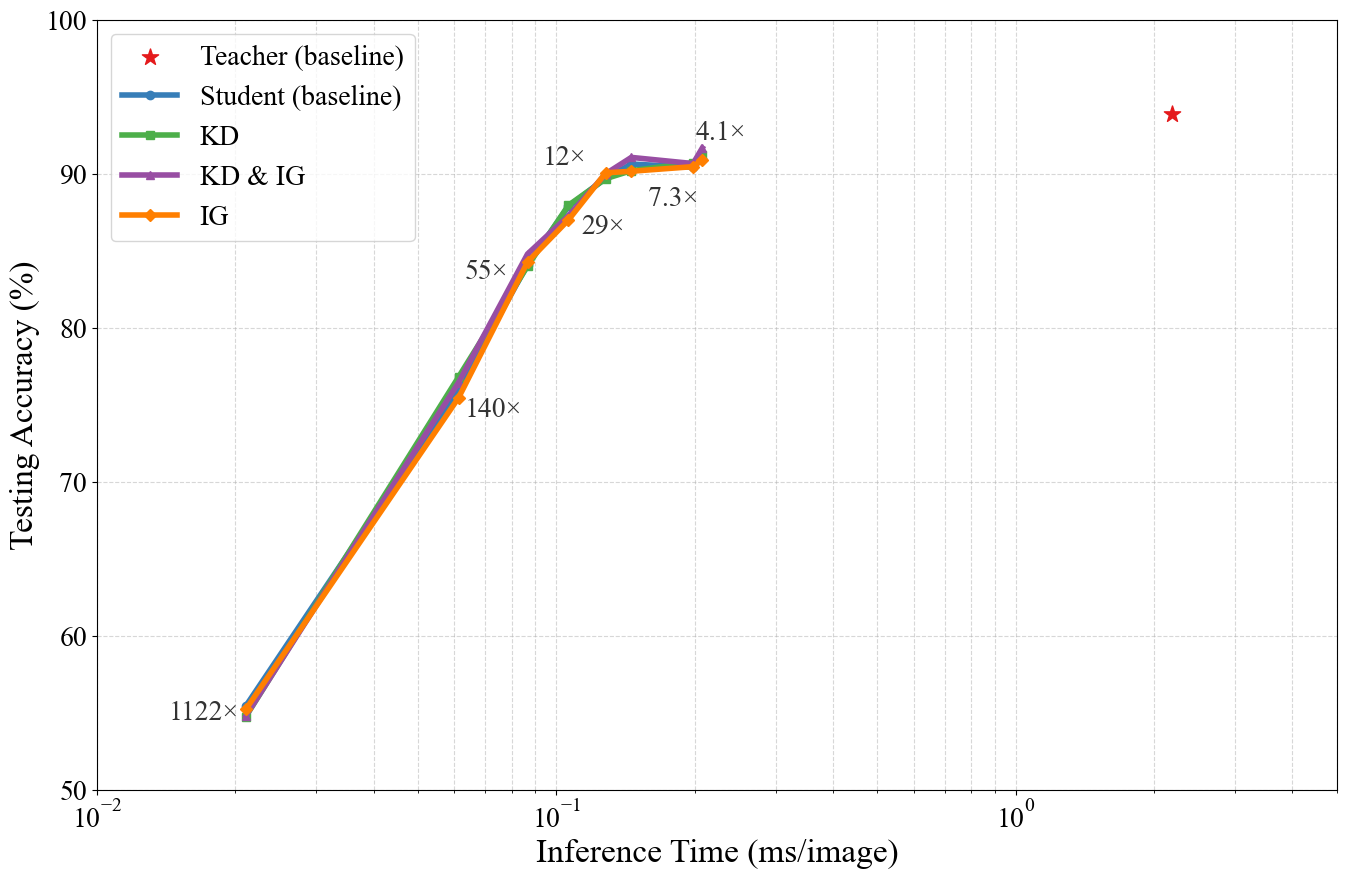

In [84]:
plt.figure(figsize=(16, 10))

plt.scatter(1.4e-1/64 * 1000, 93.91, s=150, marker='*', color='#e41a1c', label='Teacher (baseline)')
plt.plot(inference_times_ms, student_baseline, 'o-', label='Student (baseline)', color='#377eb8')
plt.plot(inference_times_ms, kd, 's-', label='KD', color='#4daf4a')
plt.plot(inference_times_ms, kd_ig, '^-', label='KD & IG', color='#984ea3')
plt.plot(inference_times_ms, ig, 'D-', label='IG', color='#ff7f00')

# Add compression factor annotations near each point
for i, cf in enumerate(compression_factors):
    if i > 0: # Skip the teacher model
        if cf == 4.1:
            plt.annotate(f'{cf}×', 
                        (inference_times_ms[i], student_baseline[i]),
                        textcoords="offset points", 
                        xytext=(20, 20), 
                        ha='center',
                        fontsize=20,
                        alpha=0.8)
        elif cf == 7.3:
            plt.annotate(f'{cf}×', 
                        (inference_times_ms[i], student_baseline[i]),
                        textcoords="offset points", 
                        xytext=(30, -30), 
                        ha='center',
                        fontsize=20,
                        alpha=0.8)
        elif cf == 12:
            plt.annotate(f'{cf}×', 
                        (inference_times_ms[i], student_baseline[i]),
                        textcoords="offset points", 
                        xytext=(-30, 10), 
                        ha='center',
                        fontsize=20,
                        alpha=0.8)
        elif cf == 55:
            plt.annotate(f'{cf}×', 
                        (inference_times_ms[i], student_baseline[i]),
                        textcoords="offset points", 
                        xytext=(-30, -10), 
                        ha='center',
                        fontsize=20,
                        alpha=0.8)
        elif cf == 1122:
            plt.annotate(f'{cf}×', 
                        (inference_times_ms[i], student_baseline[i]),
                        textcoords="offset points", 
                        xytext=(-30, -10), 
                        ha='center',
                        fontsize=20,
                        alpha=0.8)
        else:
            plt.annotate(f'{cf}×', 
                        (inference_times_ms[i], student_baseline[i]),
                        textcoords="offset points", 
                        xytext=(25, -20), 
                        ha='center',
                        fontsize=20,
                        alpha=0.8)
            

# Set axis properties
plt.xscale('log')
plt.xlabel('Inference Time (ms/image)', fontsize=24)
plt.ylabel('Testing Accuracy (%)', fontsize=24)
plt.ylim([50, 100])
plt.xlim([1e-2, 5e0])
plt.grid(True, which='both', linestyle='--', alpha=.5)
plt.legend(loc='best')
plt.savefig('accuracy_vs_inference_time.pdf', bbox_inches='tight')
plt.show()